In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import normal_ad
from sklearn.model_selection import train_test_split
from scipy import stats


# 1. 数据预处理
# 1.1 读取数据
data = pd.read_csv('/Users/wenqing_liu/Desktop/第三学期/Regression method/作业/作业4/house_data.csv')

# 1.2 查看数据结构
print(data.info())

# 1.3 查看数据描述
print(data.describe())

# 1.4 查看数据前几行
print(data.head())

# 1.5 查看数据后几行
print(data.tail())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695   

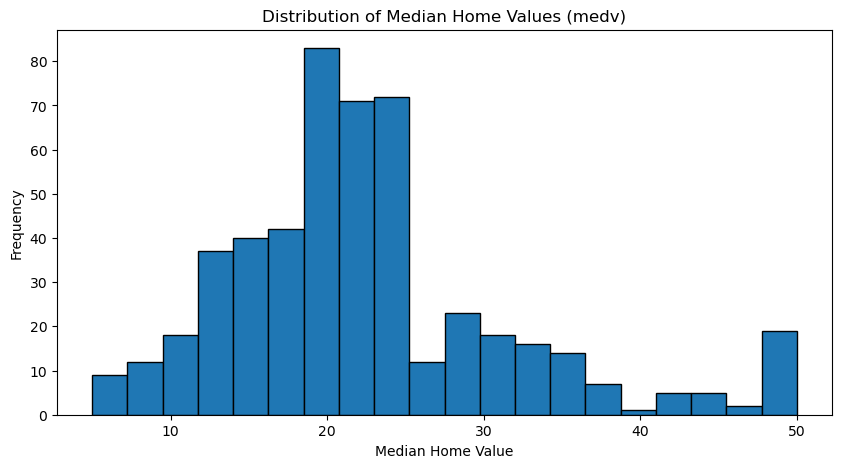

In [7]:
plt.figure(figsize=(10, 5))
plt.hist(data['MEDV'], bins=20, edgecolor='k')
plt.title('Distribution of Median Home Values (medv)')
plt.xlabel('Median Home Value')
plt.ylabel('Frequency')
plt.show()


Coefficients: [-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
 -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
  2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
 -5.47113313e-01]
Intercept: 31.63108403569415
Mean Squared Error: 21.517444231177038
R-squared: 0.7112260057484956


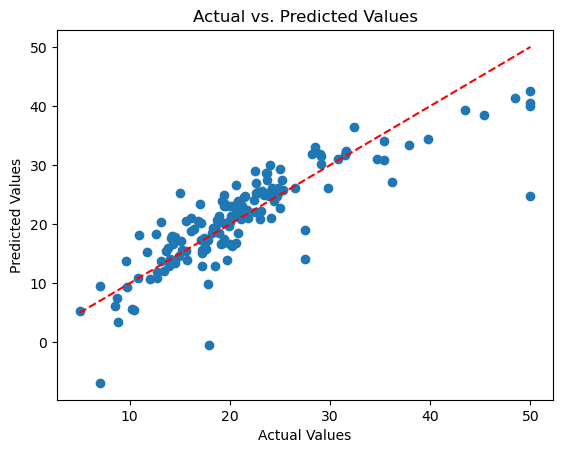

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



X = data.drop('MEDV', axis=1)  # 特征变量
y = data['MEDV']  # 响应变量

# 将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建线性回归模型
model = LinearRegression()

# 拟合模型
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 输出结果
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

# 绘制实际值与预测值的图
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     75.81
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           4.96e-92
Time:                        19:56:54   Log-Likelihood:                -1053.8
No. Observations:                 354   AIC:                             2136.
Df Residuals:                     340   BIC:                             2190.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.0158      0.258     89.379      0.0

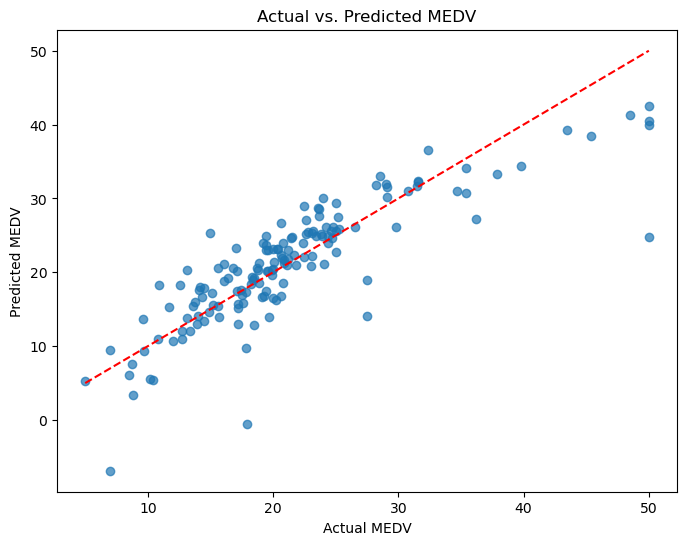

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. 加载数据
boston = fetch_openml(name='boston', version=1, as_frame=True)
data = boston.frame

# 2. 准备特征变量和响应变量
X = data.drop('MEDV', axis=1)
y = data['MEDV']

# 3. 拆分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. 特征标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. 添加常数项（截距）
X_train_sm = sm.add_constant(X_train_scaled)
X_test_sm = sm.add_constant(X_test_scaled)

# 6. 创建并训练 OLS 模型
model = sm.OLS(y_train, X_train_sm).fit()

# 7. 输出模型摘要
print(model.summary())

# 8. 进行预测
y_pred = model.predict(X_test_sm)

# 9. 绘制实际值与预测值的图
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs. Predicted MEDV')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()


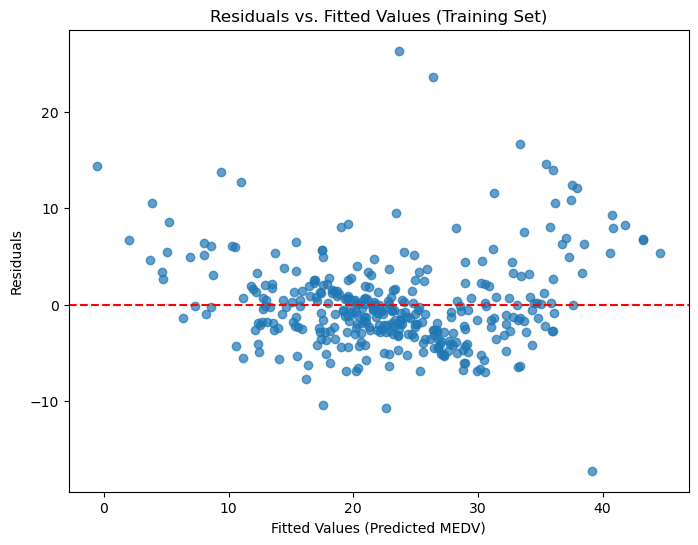

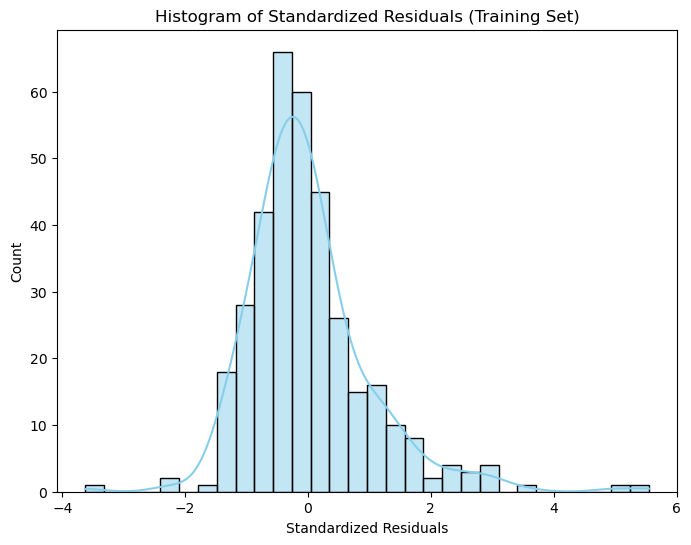

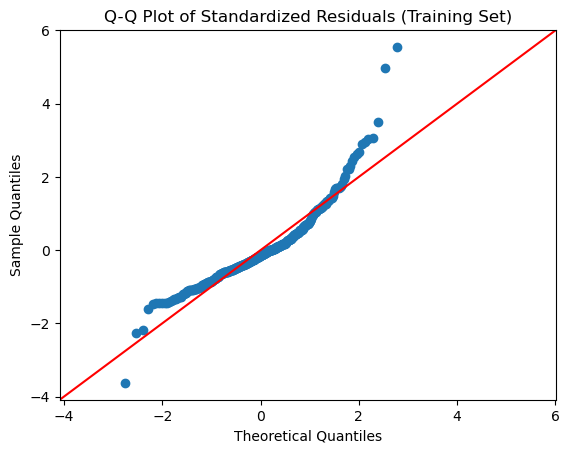

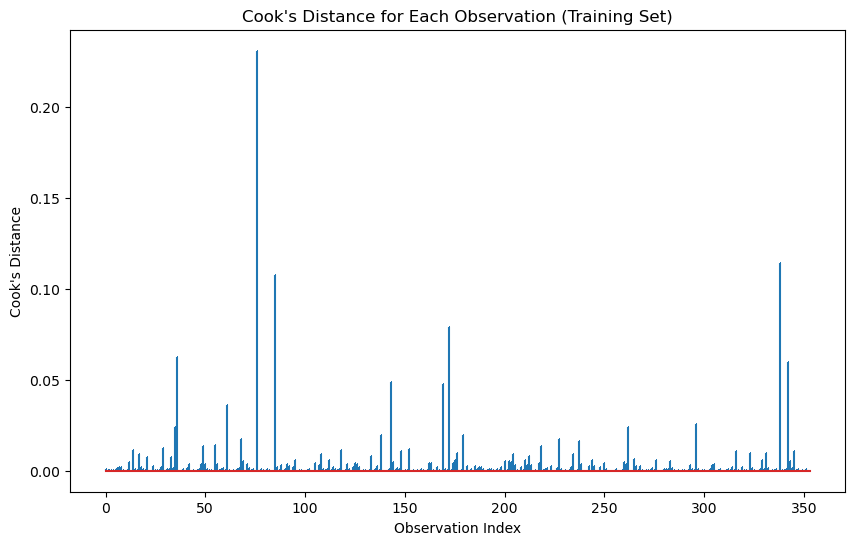

Observations with Cook's Distance > 0.0113: [ 14  29  35  36  49  55  61  68  76  85 118 138 143 152 169 172 179 218
 227 237 262 296 338 342]


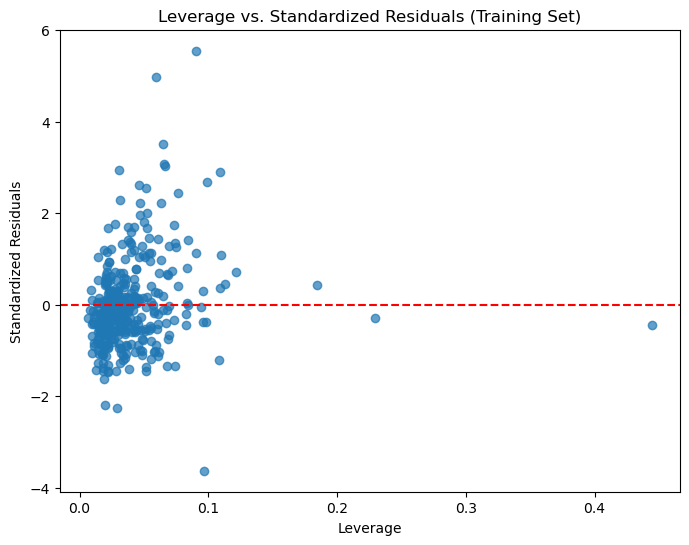

Observations with |Standardized Residuals| > 3: [ 36  76  85 143 169 338]


In [22]:


# 8. 进行预测（在训练集和测试集上）
y_train_pred = model.predict(X_train_sm)
y_test_pred = model.predict(X_test_sm)

# 9. 计算残差（在训练集上）
residuals_train = y_train - y_train_pred

# 10. 计算标准化残差（基于训练集）
standardized_residuals_train = residuals_train / np.std(residuals_train)

# 11. 绘制残差与拟合值的关系图（基于训练集）
plt.figure(figsize=(8,6))
plt.scatter(y_train_pred, residuals_train, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values (Predicted MEDV)')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values (Training Set)')
plt.show()

# 12. 分析响应变量的方差是否依赖于其均值
# 从残差与拟合值的图中观察
# 如果残差的散布随着拟合值的增大而增大或减小，则方差依赖于均值

# 13. 检查标准化残差是否近似正态分布（基于训练集）
plt.figure(figsize=(8,6))
sns.histplot(standardized_residuals_train, kde=True, bins=30, color='skyblue')
plt.xlabel('Standardized Residuals')
plt.title('Histogram of Standardized Residuals (Training Set)')
plt.show()

# 绘制 Q-Q 图
sm.qqplot(standardized_residuals_train, line='45', fit=True)
plt.title('Q-Q Plot of Standardized Residuals (Training Set)')
plt.show()

# 14. 识别最具影响力的点（基于训练集）
influence = model.get_influence()
cooks_d, p = influence.cooks_distance

# 15. 绘制 Cook's Distance
plt.figure(figsize=(10,6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance for Each Observation (Training Set)")
plt.show()

# 16. 识别具有高 Cook's Distance 的点
threshold = 4 / len(cooks_d)  # 常用阈值
influential_points = np.where(cooks_d > threshold)[0]
print(f"Observations with Cook's Distance > {threshold:.4f}: {influential_points}")

# 17. 绘制杠杆值（Leverage）与标准化残差的关系图（基于训练集）
leverage = influence.hat_matrix_diag
plt.figure(figsize=(8,6))
plt.scatter(leverage, standardized_residuals_train, alpha=0.7)
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.title('Leverage vs. Standardized Residuals (Training Set)')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# 18. 识别异常值（Outliers）基于训练集
# 根据标准化残差的绝对值大于某个阈值（如2或3）
outliers = np.where(np.abs(standardized_residuals_train) > 3)[0]
print(f"Observations with |Standardized Residuals| > 3: {outliers}")


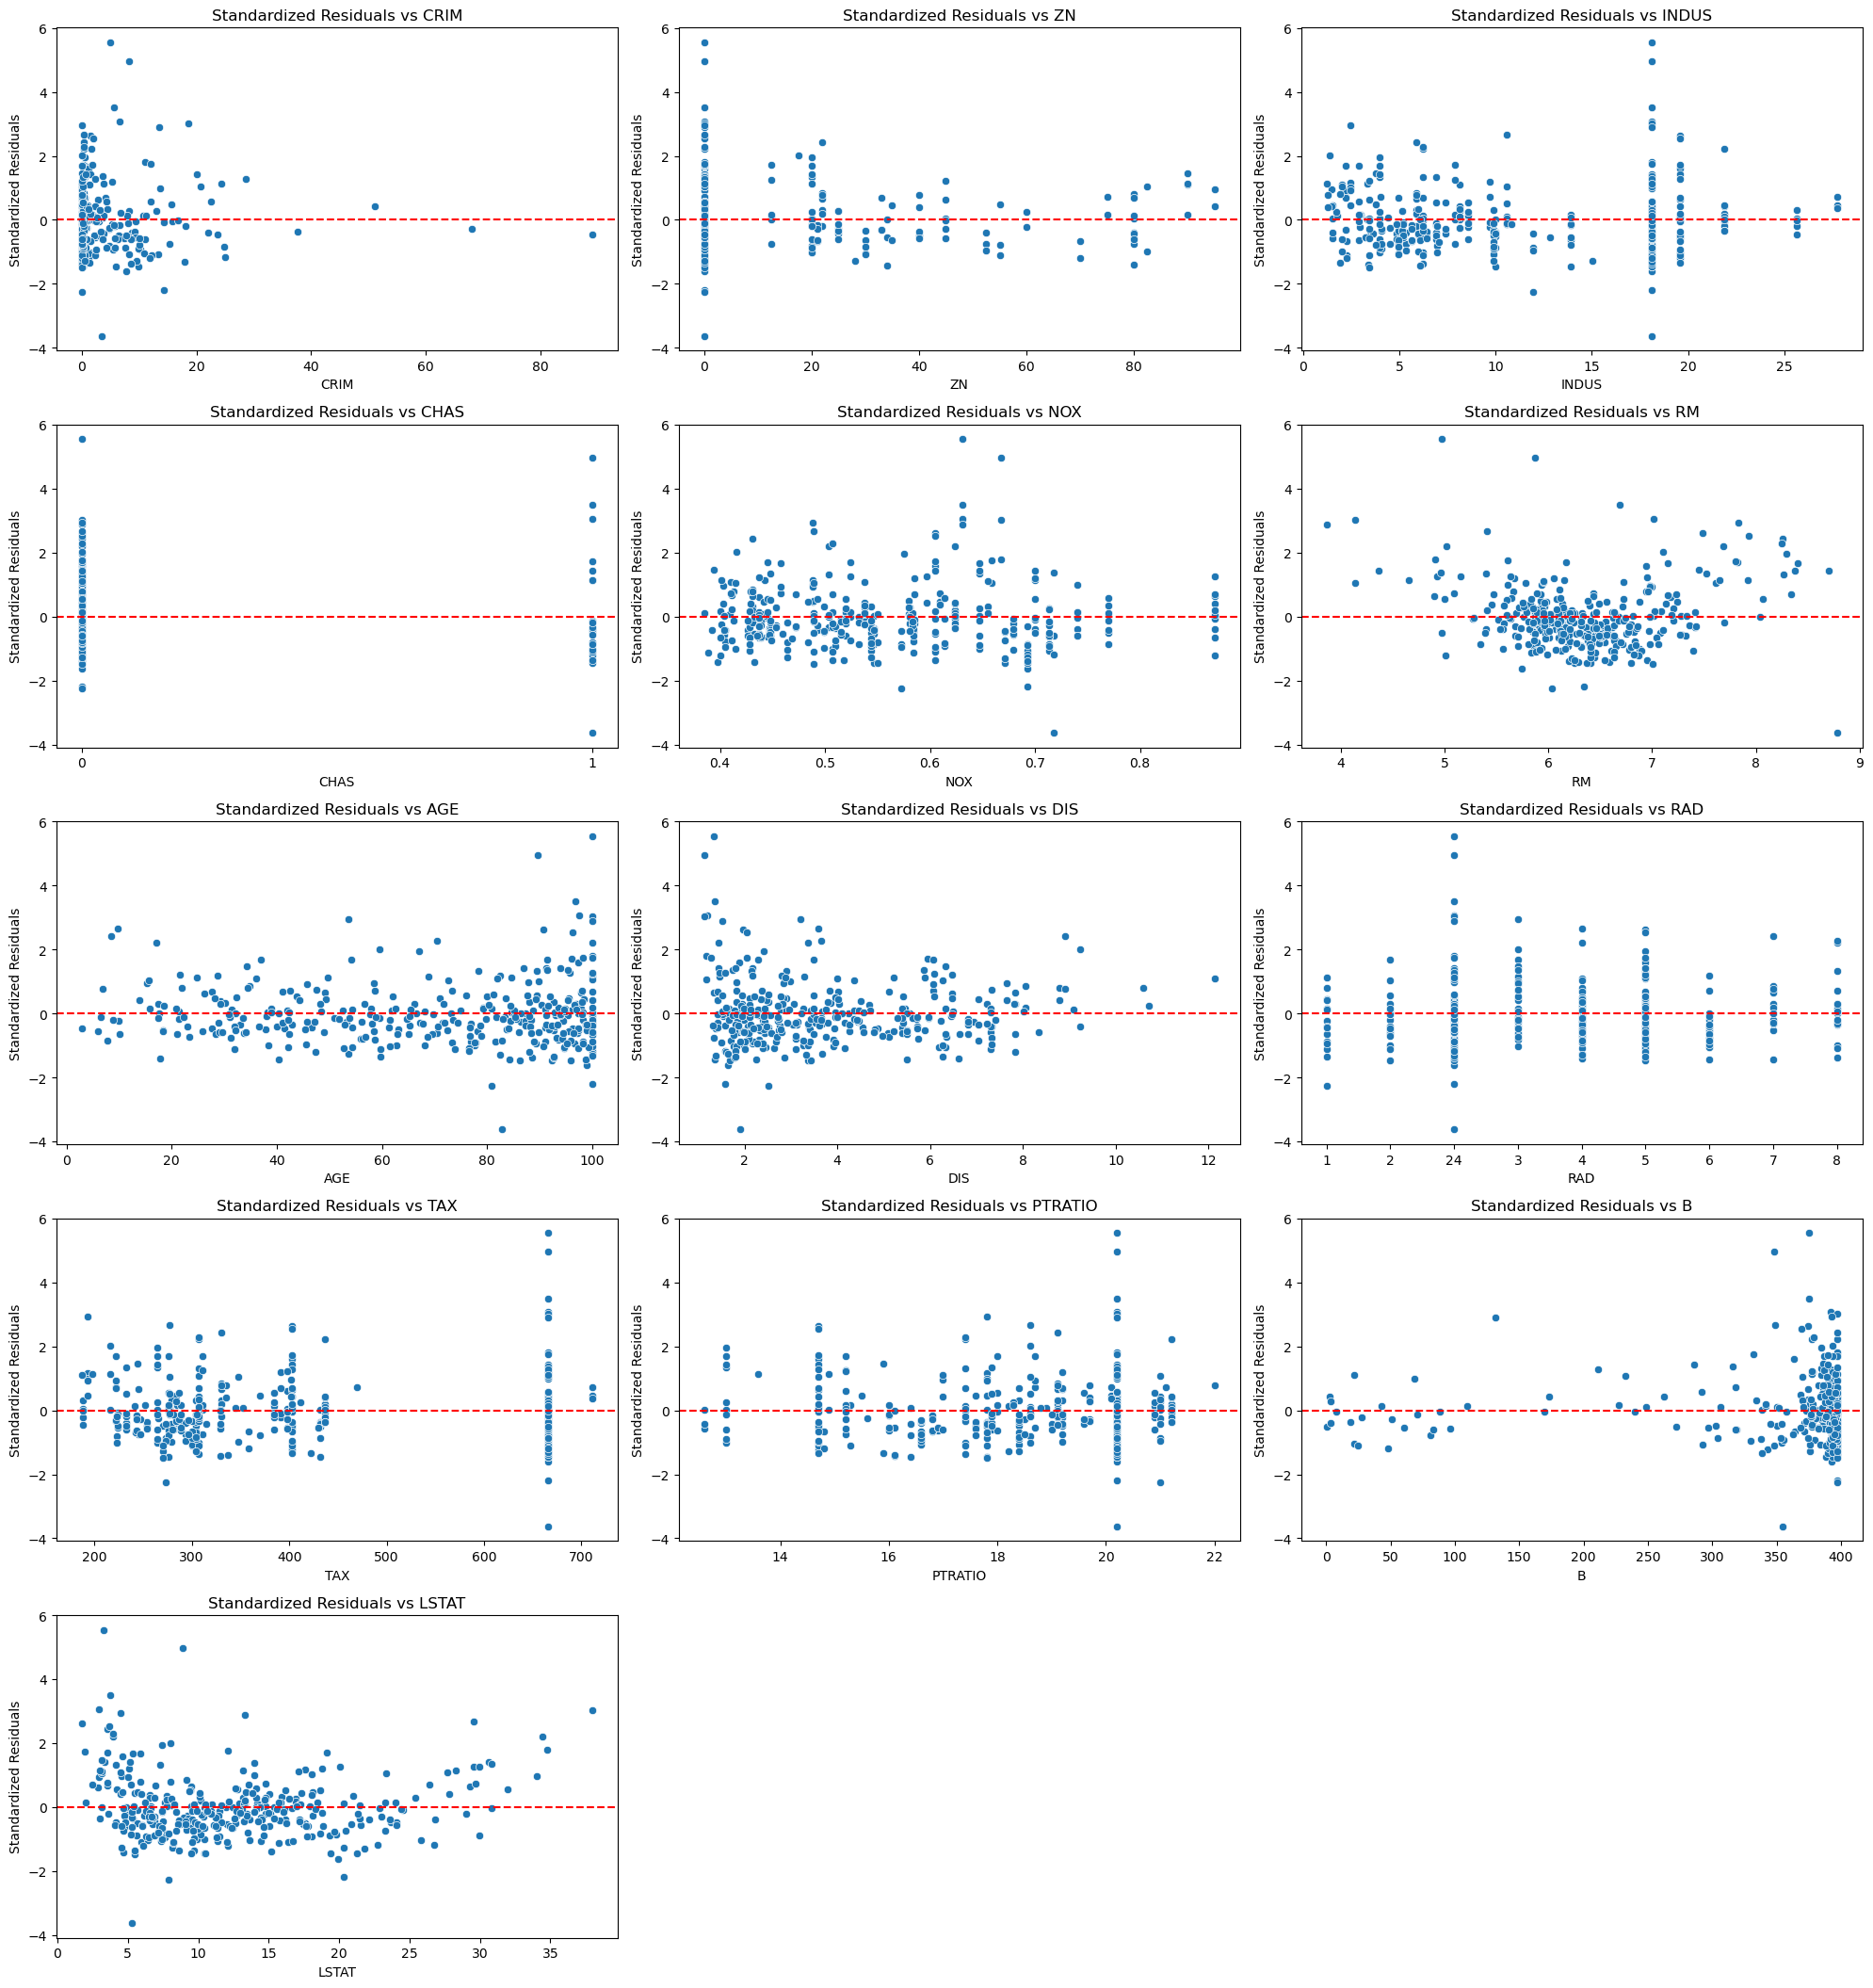

In [23]:
standardized_residuals_train = residuals_train / np.std(residuals_train)

# 11. 将标准化残差添加回训练集数据框
X_train_with_residuals = X_train.copy()
X_train_with_residuals['Standardized Residuals'] = standardized_residuals_train

# 12. 绘制标准化残差与每个解释变量的关系图
variables = X.columns  # 原始变量名
plt.figure(figsize=(20, 25))
for i, var in enumerate(variables, 1):
    plt.subplot(6, 3, i)
    sns.scatterplot(x=X_train_with_residuals[var], y=X_train_with_residuals['Standardized Residuals'])
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel(var)
    plt.ylabel('Standardized Residuals')
    plt.title(f'Standardized Residuals vs {var}')
plt.tight_layout()
plt.show()